In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import _sort_contours as sort_cntr

## 1. Start with "contours.ipynb"

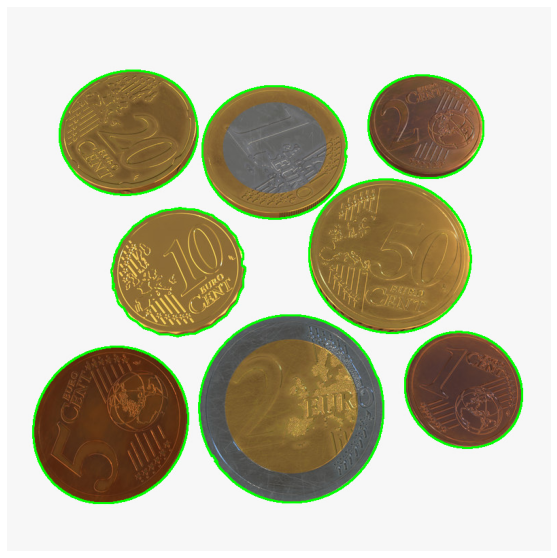

In [2]:
coins = cv2.cvtColor(cv2.imread('images/coins5.jpg'), cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

retval, threshold = cv2.threshold(coins_gray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

coins_copy = coins.copy()
cv2.drawContours(coins_copy, sorted_contours[0:8], -1, (0,255,0), 2) # 2=thickness

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_copy, cmap='gray')

## 2. Bounding Rectangle

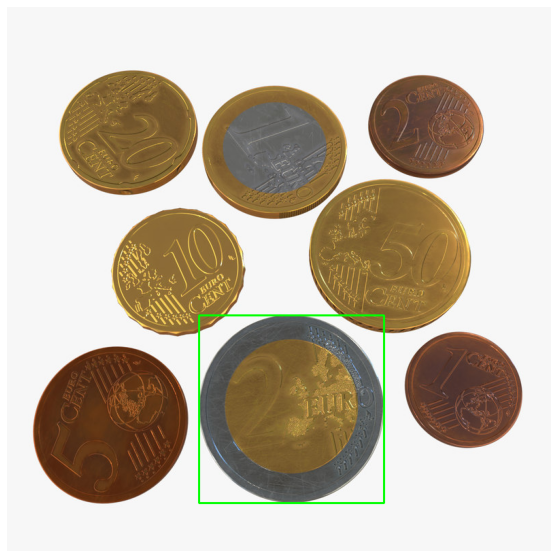

In [3]:
# clean_contours is an array of arrays
clean_contours = sorted_contours[0:9]

# works with grayscale img or contours
# needs an array of numbers
x,y,w,h = cv2.boundingRect(clean_contours[0])

coins_copy = coins.copy()

cv2.rectangle(coins_copy, (x,y), (x+w, y+h), (0,255,0), 2)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_copy, cmap='gray')

## 3. Crop the image

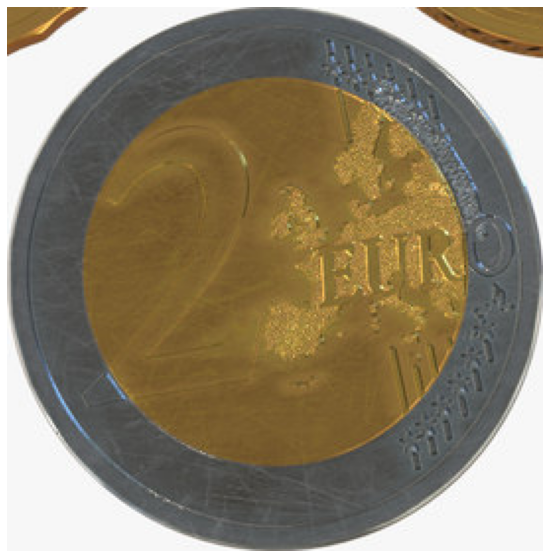

In [4]:
# cropping
two_euro_coin = coins[y:y+h, x:x+w]

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(two_euro_coin, cmap='gray')

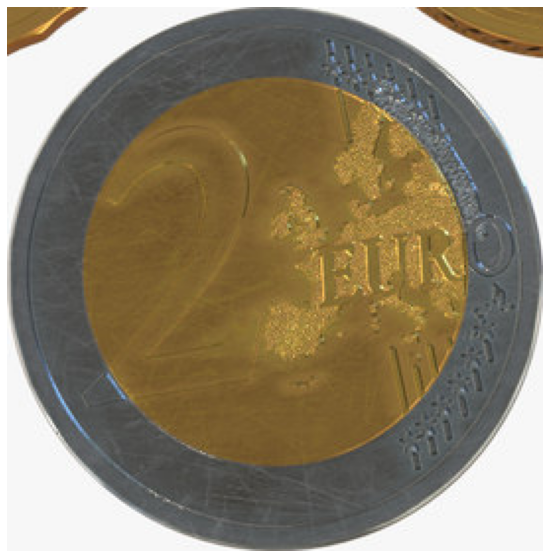

In [5]:
x,y,w,h = cv2.boundingRect(clean_contours[1]) # for the second coin

fifty_cents_coin = coins[y:y+h, x:x+w]

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(two_euro_coin, cmap='gray')

## 4. Enclosing Circle

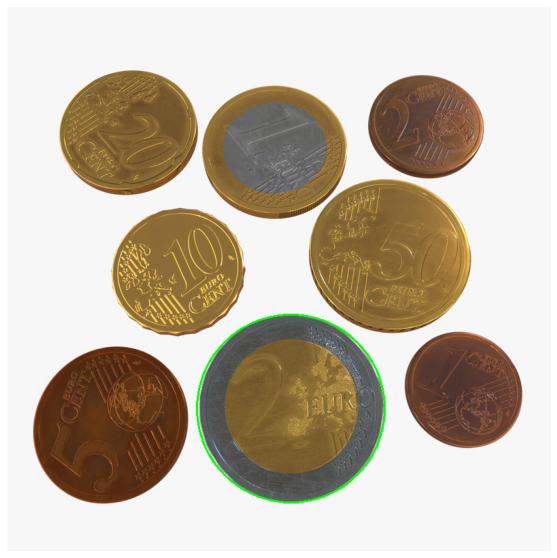

In [6]:
# get the coordinates of the center, and lenght of the radius
(x,y), radius = cv2.minEnclosingCircle(clean_contours[0])

coins_copy = coins.copy()
# they all need to be converted to integer
x = int(x)
y = int(y)
radius = int(radius)

cv2.circle(coins_copy, (x,y), radius, (0,255,0), 2)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_copy, cmap='gray')

#### Example for another image

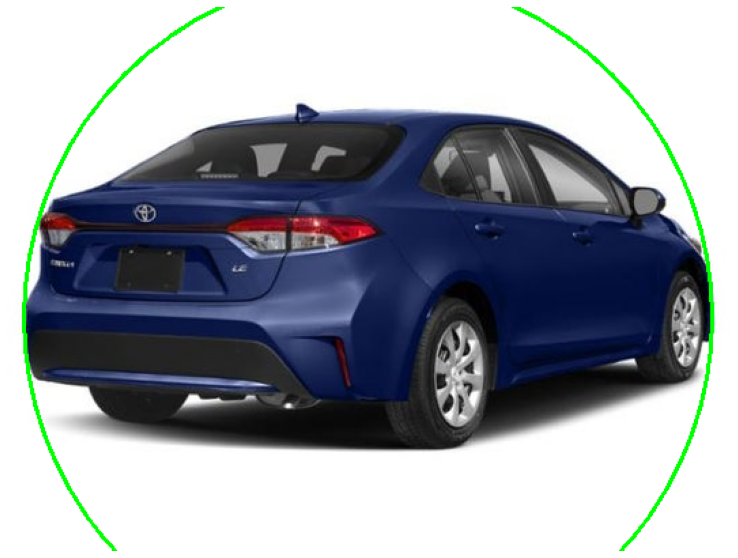

In [7]:
# from the beginning
# grayscale
car = cv2.cvtColor(cv2.imread('images/car1.jpg'), cv2.COLOR_BGR2RGB)
car_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
# binary
retval, threshold = cv2.threshold(car_gray, 200, 255, cv2.THRESH_BINARY_INV)
# get contours
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# sort contours
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
clean_contours = sorted_contours[0:9]

# get the coordinates of the center, and lenght of the radius
(x,y), radius = cv2.minEnclosingCircle(clean_contours[0])
# always use a copy
car_copy = car.copy()

# they all need to be converted to integer
x = int(x)
y = int(y)
radius = int(radius)
# draw the circle
cv2.circle(car_copy, (x,y), radius, (0,255,0), 2)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(car_copy, cmap='gray')

## 5. Fitting an Ellipse

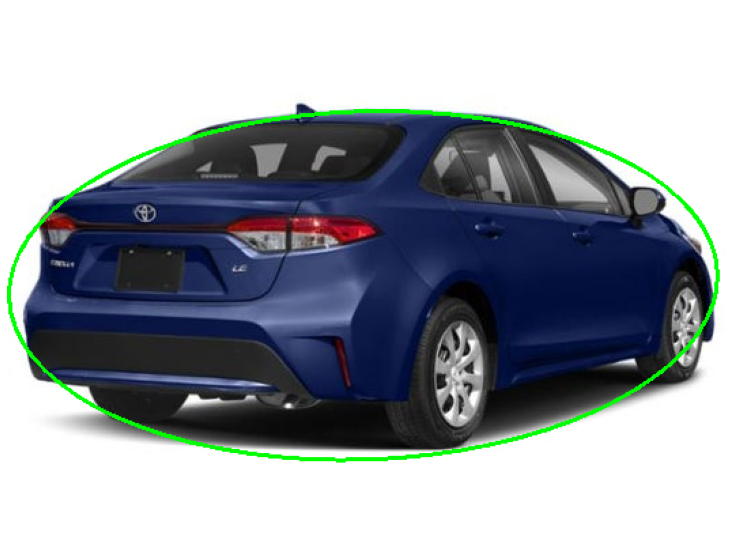

In [8]:
ellipse = cv2.fitEllipse(contours[0])
car_copy = car.copy()
cv2.ellipse(car_copy, ellipse, (0,255,0), 2)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(car_copy, cmap='gray')

## 6. Convex Hull

1


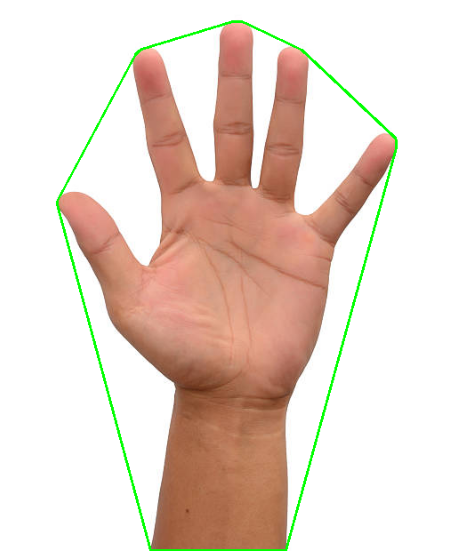

In [10]:
hand = cv2.cvtColor(cv2.imread('images/hand.jpg'), cv2.COLOR_BGR2RGB)
hand_gray = cv2.imread('images/hand.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(hand_gray, 220, 255, cv2.THRESH_BINARY_INV)

contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
#################################################################################
hand_copy = hand.copy()
# for contour in contours:
hull = cv2.convexHull(contours[0])
cv2.drawContours(hand_copy, [hull], 0, (0,255,0), 2) # 0 = index

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(hand_copy, cmap='gray')